In [34]:
import csv
import numpy as np
import pandas as pd
import patsy 

%matplotlib inline

# For running regressions and R-type formulas
import statsmodels
import statsmodels.api as sm
# R type regression formulas
import statsmodels.formula.api as smf

df = pd.read_csv('parsed_data_1a.csv')

print len(df)
df = df.dropna()
#df = df[df['avg_similarity'] > 0.01]
print len(df)

22510
4105


In [35]:
df.performance = df.performance.apply(lambda x: np.log(x))
df = df[df['performance'] > 0]
#df = df[df['avg_similarity'] > 0]
#df = df.dropna()
print len(df)
#df.performance

3128


In [17]:
df.head(3)

,pnum,firm,performance,inv_num,avg_similarity
0,6417100,AMD,0.693147,42,0
4,6399902,AMD,0.693147,28,0
5,6399493,AMD,1.098612,42,0


In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pnum,3128,6417289.090473,257190.119127,6010957.000000,6196551.000000,6393516.50000,6617200.000000,6981119.000000
performance,3128,1.978434,0.895540,0.693147,1.386294,1.94591,2.564949,4.852030
avg_similarity,3128,0.000888,0.019523,0.000000,0.000000,0.00000,0.000000,0.666667


In [24]:
# Design matrices (endog & exog)
# http://statsmodels.sourceforge.net/devel/gettingstarted.html
y, X = patsy.dmatrices('performance ~ avg_similarity + np.square(avg_similarity)', data=df, return_type='dataframe')
#y, X = patsy.dmatrices('performance ~ avg_similarity + np.square(avg_similarity)', data=df, return_type='dataframe')

#y[:3]
#X[:3]

mod = sm.OLS(y, X)    # Describe model
res = mod.fit()       # Fit model
print res.summary()   # Summarize model

                            OLS Regression Results                            
Dep. Variable:            performance   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.940
Date:                Mon, 22 Feb 2016   Prob (F-statistic):              0.144
Time:                        15:23:42   Log-Likelihood:                -4090.9
No. Observations:                3128   AIC:                             8188.
Df Residuals:                    3125   BIC:                             8206.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Intercept             

In [30]:
#res.params

In [31]:
sm.stats.linear_rainbow(res)

(0.90865514832327465, 0.97081288160738544)

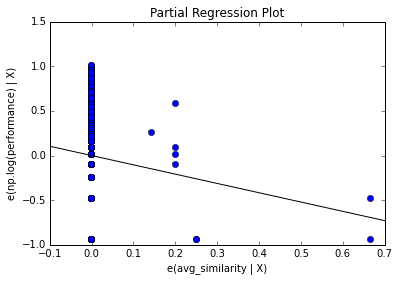

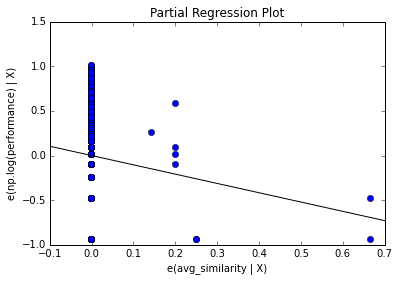

In [32]:
sm.graphics.plot_partregress('np.log(performance)', 'avg_similarity', [], data=df, obs_labels=False)